In [1]:
# config
config_name = 'PhysNet.yaml'
force_clear_train_cache = False
force_clear_test_cache = False

In [2]:
from singleton_pattern import load_model,load_config
from singleton_pattern.load_dataset_reader import get_train_reader,get_test_reader
from singleton_pattern.load_data_generator import get_train_data_generator,get_test_data_generator
from util.cache import Cache
load_config.init_config(config_name)

from util.torch_info import print_info
print_info()
non_dnn_method_list = load_config.get_non_dnn_method_list()

config_hash = load_config.get_config_hash()
print(f'config_hash:{config_hash}')

config = load_config.get_config()
print(f'Method and Preprocessing Name: {config["method"]}')
# print(f'Model:\n------------------\n{model}\n------------------')

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
config_hash:dffd96ff90923e19249e4bfb6286fb06aafdac261a7d73b96833914d4370072f
Method and Preprocessing Name: PhysNet


In [3]:
train_twice = False
# train_twice = True

import datetime
if config['method'] in non_dnn_method_list: 
    raise Exception('non train method')
model = load_model.get_model()
if train_twice:
    cache_model = Cache('model').read_model()
    model.load_state_dict(cache_model.state_dict())

train_reader = get_train_reader()
print(f'train_reader: {train_reader.loader_name}')
data = train_reader.load_data()
tensor_data_generator = get_train_data_generator()
dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=force_clear_train_cache)
start_time = datetime.datetime.now()
model.train_model(dataloader)
runtime = datetime.datetime.now() - start_time
hours, remainder = divmod(runtime.total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"train total time:  {int(hours)}h:{int(minutes)}m:{int(seconds)}s")

cache\dffd96ff90923e19249e4bfb6286fb06aafdac261a7d73b96833914d4370072f\model
train_reader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-10
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/10 [00:00<?, ?it/s]

cache\dffd96ff90923e19249e4bfb6286fb06aafdac261a7d73b96833914d4370072f\train
dataset size: 882
start training...


Progress:   0%|          | 0/100 [00:00<?, ?it/s]

cache\dffd96ff90923e19249e4bfb6286fb06aafdac261a7d73b96833914d4370072f\model
Epoch [1/100], Loss: 0.2252
Epoch [2/100], Loss: 0.2289
Epoch [3/100], Loss: 0.2245
Epoch [4/100], Loss: 0.2148
Epoch [5/100], Loss: 0.2138
Epoch [6/100], Loss: 0.2072
Epoch [7/100], Loss: 0.2016
Epoch [8/100], Loss: 0.2077
Epoch [9/100], Loss: 0.1997
Epoch [10/100], Loss: 0.1988
Epoch [11/100], Loss: 0.1943
Epoch [12/100], Loss: 0.1922
Epoch [13/100], Loss: 0.1981


Test Loader: UBFC_Phys


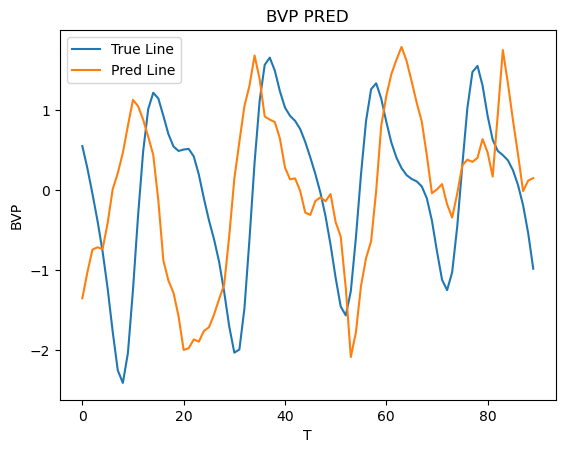

In [8]:
use_cache_model = False

import matplotlib.pyplot as plt
import numpy as np
test_reader = get_test_reader()
tensor_data_generator = get_test_data_generator()
print(f'Test Loader: {test_reader.loader_name}')
data = test_reader.load_data()
test_dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=force_clear_test_cache)
# test
if 'model' not in dir():
    model = load_model.get_model()
model.eval()
if use_cache_model:
    cache_model = Cache('model').read_model()
    model.load_state_dict(cache_model.state_dict())
i = 0
for batch_X, batch_y in test_dataloader:
    index_n = 7
    if i == index_n:
        plt.title("BVP PRED")
        plt.xlabel("T")
        plt.ylabel("BVP")
        pred = model(batch_X)
        true_data = np.array(batch_y.view(-1).numpy())
        pred_data = np.array(pred.detach().view(-1).numpy())
        true_data = true_data = (true_data - true_data.mean())/true_data.std()
        pred_data = pred_data = (pred_data - pred_data.mean())/pred_data.std()
        plt.plot(true_data, label="True Line")
        plt.plot(pred_data, label="Pred Line")
        plt.legend()
        plt.show()
    if i > index_n:
        break
    i+=1

# 评价指标


In [ ]:
from method.LSTCrPPG import LSTCrPPG
from method.PhysNet import PhysNet
import torch
input_data = torch.randn(3, 3, 160, 128, 128)
model = PhysNet()
model.eval()
model(input_data)
